In [1]:
install.packages(c('igraph', 'igraphdata'))


The downloaded binary packages are in
	/var/folders/71/32h8kjzx1d957cbl0_xhpyvr0000gn/T//RtmpmARAbM/downloaded_packages


In [2]:
library(igraph)
library(igraphdata)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




### Representing networks

#### Adjacency matrix

In [3]:
A <- rbind(c(0,1,0), c(1,0,1), c(1,0,0))
nodeNames <- c("A","B","C")
dimnames(A) <- list(nodeNames, nodeNames)
A

,A,B,C
A,0,1,0
B,1,0,1
C,1,0,0


#### Find no. of paths

In [4]:
# Each (i,j) entry of result is the number of paths of length 2 from node i to node j
A %*% A

,A,B,C
A,1,0,1
B,1,1,0
C,0,1,0


In [5]:
A %*% A %*% A %*% A # Number of path of length 4

,A,B,C
A,1,1,1
B,2,1,1
C,1,1,0


#### Edge list

In [6]:
el <- rbind(c("A","B"), c("B","A"), c("B","C"), c("C","A"))
el

A,B
B,A
B,C
C,A


#### igraph

- graph_from_literal
    - Create graph from structure given
    - By default ignore loops
    - Ignore undirected edges when the graph is directed

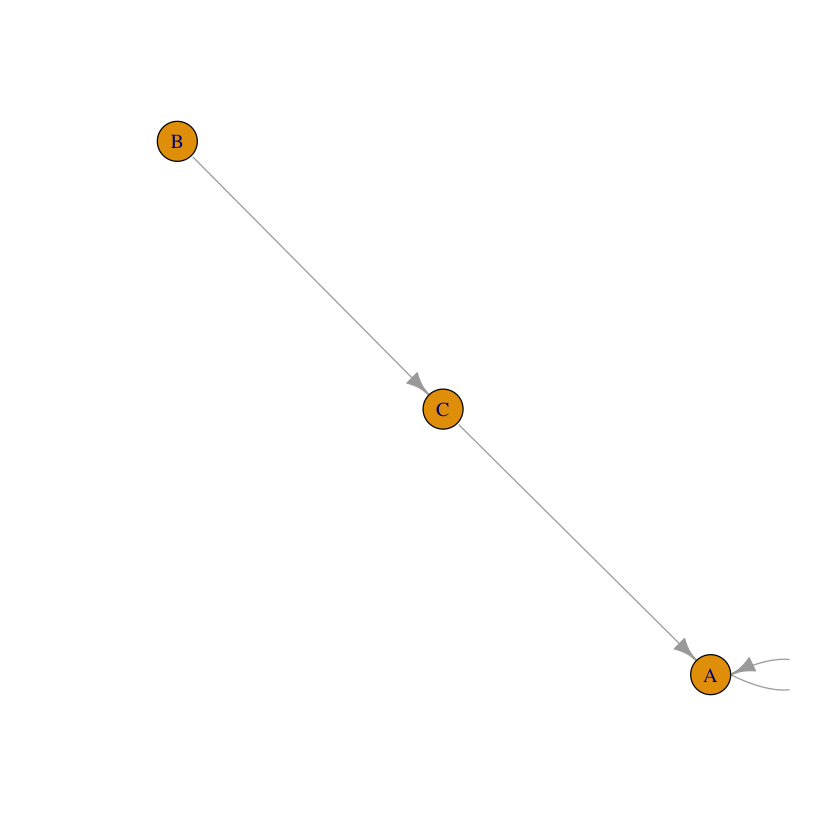

In [7]:
g <- graph_from_literal(A--B, B-+C, C-+A, A-+A, simplify = F)
plot(g)

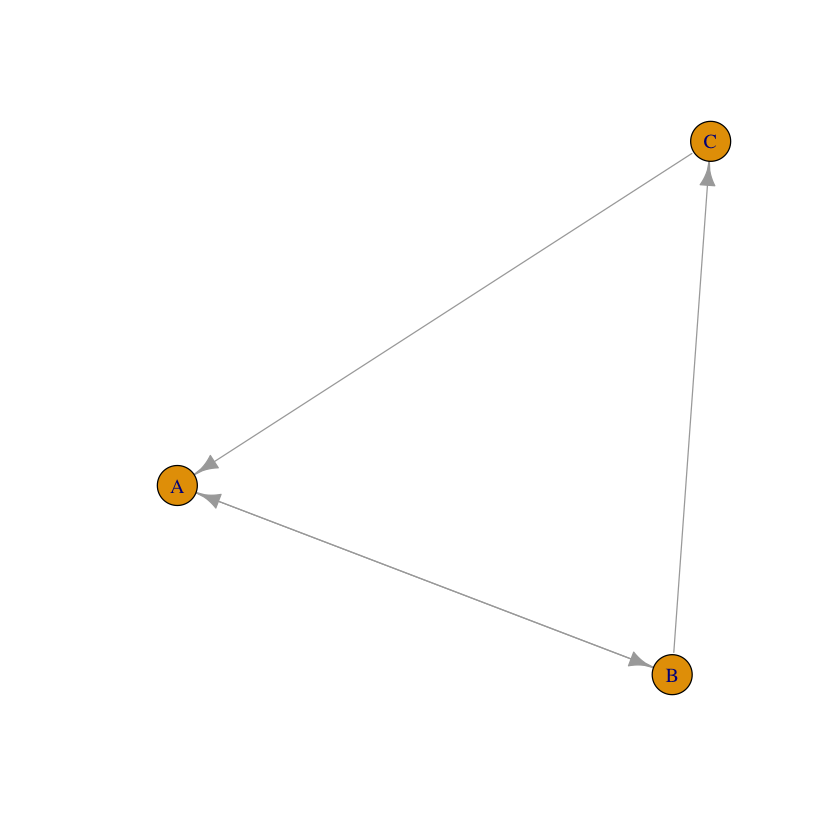

In [8]:
g <- graph_from_edgelist(el, directed=TRUE)
plot(g)

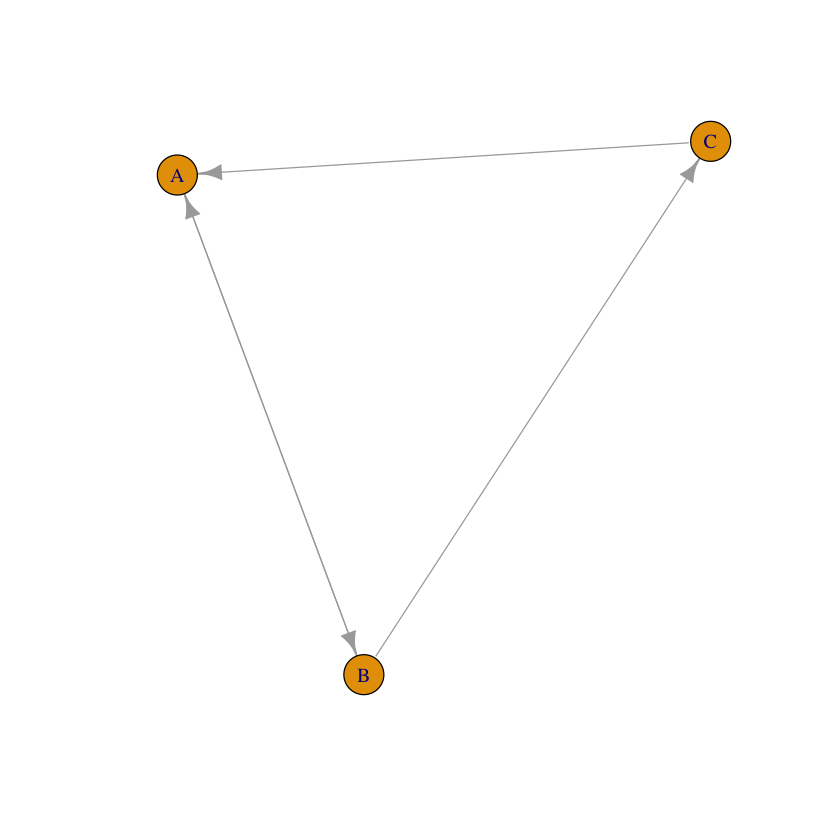

In [9]:
df <- as.data.frame(el)
g <- graph_from_data_frame(df, directed=TRUE)
plot(g)

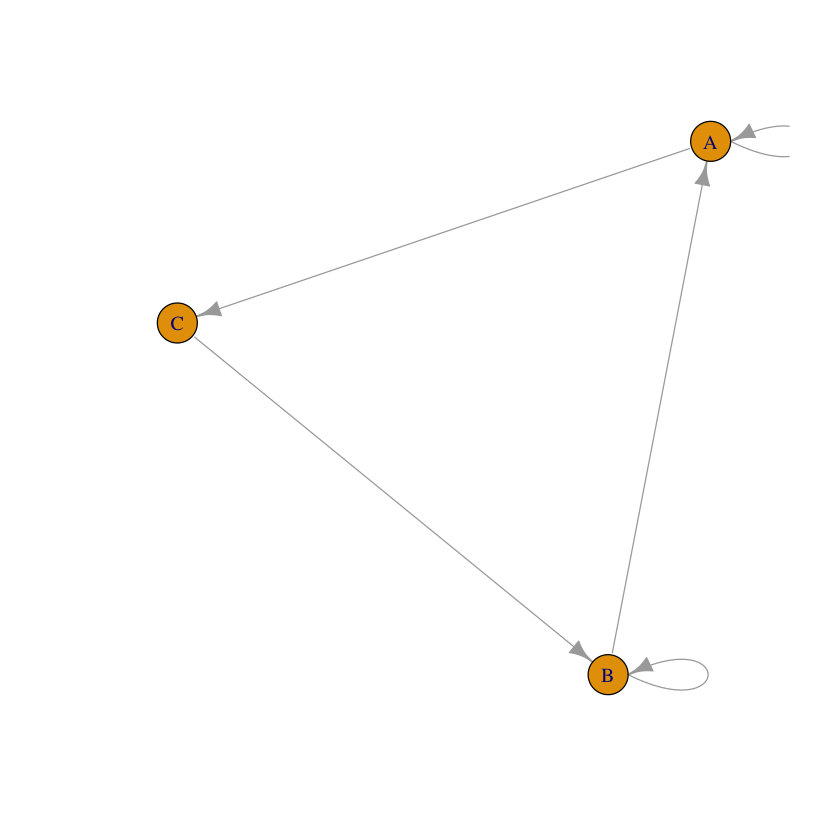

In [10]:
g <- graph_from_adjacency_matrix(A %*% A)
plot(g)

### igraph with USairports data

In [11]:
data('USairports')
graph_attr(USairports) # get graph properties

$name
[1] "US airports"

In [12]:
vertex_attr_names(USairports) # get vertex (airport) property names

[1] "name"     "City"     "Position"

In [13]:
vertex_attr(USairports, 'City')[1:5] # get first 5 vertex city property

[1] "Bangor, ME"    "Boston, MA"    "Anchorage, AK" "New York, NY" 
[5] "Las Vegas, NV"

In [14]:
edge_attr_names(USairports) # get edge (flight) property names

[1] "Carrier"    "Departures" "Seats"      "Passengers" "Aircraft"  
[6] "Distance"

In [15]:
edge_attr(USairports, 'Carrier')[1:5] # get first 5 flight (edge) Carrier property

[1] "British Airways Plc" "British Airways Plc" "British Airways Plc"
[4] "China Airlines Ltd." "China Airlines Ltd."

In [16]:
V(USairports)[1:5] # subset first 5 vertex by index (names returned)

+ 5/755 vertices, named, from bf6202d:
[1] BGR BOS ANC JFK LAS

In [17]:
V(USairports)['BGR'] # subset by name

+ 1/755 vertex, named, from bf6202d:
[1] BGR

In [18]:
V(USairports)[['BGR']] # subset by name and get all properties

+ 1/755 vertex, named, from bf6202d:
  name       City         Position
1  BGR Bangor, ME N444827 W0684941

In [19]:
V(USairports)[1:5]$City # another way of getting first 5 vertex city property

[1] "Bangor, ME"    "Boston, MA"    "Anchorage, AK" "New York, NY" 
[5] "Las Vegas, NV"

In [20]:
# add Group property to vertices
V(USairports)$Group <- sample(c('A', 'B'), vcount(USairports), replace = T)
V(USairports)[[1:5]]

+ 5/755 vertices, named, from bf6202d:
  name          City         Position Group
1  BGR    Bangor, ME N444827 W0684941     A
2  BOS    Boston, MA N422152 W0710019     A
3  ANC Anchorage, AK N611028 W1495947     B
4  JFK  New York, NY N403823 W0734644     A
5  LAS Las Vegas, NV N360449 W1150908     B

In [21]:
E(USairports)[['JFK' %--% 'BOS']] # get edge joining vertex JFK and BOS in both directions

+ 26/23473 edges from bf6202d (vertex names):
      tail head tid hid                      Carrier Departures Seats
5028   BOS  JFK   2   4              JetBlue Airways        113 11300
5029   BOS  JFK   2   4              JetBlue Airways         82 12300
5143   JFK  BOS   4   2              JetBlue Airways        112 11200
5144   JFK  BOS   4   2              JetBlue Airways         86 12900
8156   BOS  JFK   2   4             Compass Airlines          2   152
8227   JFK  BOS   4   2             Compass Airlines          2   152
8422   BOS  JFK   2   4       Pinnacle Airlines Inc.         21  1050
8656   JFK  BOS   4   2       Pinnacle Airlines Inc.         20   999
9469   BOS  JFK   2   4         Delta Air Lines Inc.          2   337
14193  BOS  JFK   2   4                  Comair Inc.         43  2150
14194  BOS  JFK   2   4                  Comair Inc.         11   550
14195  BOS  JFK   2   4                  Comair Inc.         11   715
14196  BOS  JFK   2   4                  Com

In [22]:
unique(E(USairports)['JFK' %->% 'BOS']$Carrier) # get unique carriers from JFK to BOS with

[1] "JetBlue Airways"              "Compass Airlines"            
[3] "Pinnacle Airlines Inc."       "Comair Inc."                 
[5] "Atlantic Southeast Airlines"  "American Eagle Airlines Inc."
[7] "Chautauqua Airlines Inc."

In [23]:
cas <- grep('CA$', V(USairports)$City) # select vertex that have city ending with CA
nys <- grep('NY$', V(USairports)$City)

E(USairports)[[V(USairports)[cas] %->% V(USairports)[nys]]] # return all flights from California to New York

+ 35/23473 edges from bf6202d (vertex names):
      tail head tid hid                Carrier Departures Seats Passengers
13     LAX  JFK  10   4    Qantas Airways Ltd.         27  6337       4117
4231   LAX  JFK  10   4 American Airlines Inc.          4   746        569
4232   LAX  JFK  10   4 American Airlines Inc.        278 46702      40967
4233   LAX  JFK  10   4 American Airlines Inc.          1   225        141
4502   SAN  JFK 159   4 American Airlines Inc.         28  5254       4667
4518   SFO  JFK  18   4 American Airlines Inc.          1   182        138
4519   SFO  JFK  18   4 American Airlines Inc.        114 19152      16327
4520   SFO  JFK  18   4 American Airlines Inc.         29  6525       5629
5070   BUR  JFK 195   4        JetBlue Airways         61  9150       7917
5207   LAX  JFK  10   4        JetBlue Airways        122 18300      15957
5215   LGB  JFK 381   4        JetBlue Airways         53  7950       6763
5257   OAK  JFK 199   4        JetBlue Airways        

In [24]:
calAirports <- induced_subgraph(USairports, cas) # get subgraph containing all California airports
calAirports

IGRAPH e54a2d4 DN-- 34 381 -- US airports
+ attr: name (g/c), name (v/c), City (v/c), Position (v/c), Group
| (v/c), Carrier (e/c), Departures (e/n), Seats (e/n), Passengers
| (e/n), Aircraft (e/n), Distance (e/n)
+ edges from e54a2d4 (vertex names):
 [1] LAX->SFO LAX->SFO LAX->SFO LAX->SFO LAX->SFO LAX->SFO LAX->SFO LAX->SFO
 [9] LAX->SFO LAX->SFO LAX->SFO LAX->SFO LAX->SFO LAX->SFO LAX->SFO LAX->SFO
[17] LAX->SAN LAX->SAN LAX->SAN LAX->SAN LAX->SAN LAX->SAN LAX->SAN LAX->SAN
[25] LAX->SAN LAX->SAN LAX->SAN LAX->SAN LAX->SAN LAX->SAN LAX->SMF LAX->SMF
[33] LAX->SMF LAX->SMF LAX->SMF LAX->SMF LAX->SMF LAX->SNA LAX->BUR LAX->OAK
[41] LAX->OAK LAX->OAK LAX->OAK LAX->OAK LAX->ONT LAX->ONT LAX->SJC LAX->SJC
+ ... omitted several edges

In [25]:
# get vertex within order of 2 from 'JFK', 'LAX' vertices
d2Vertices <- ego(USairports, nodes = c('JFK', 'LAX'), order = 2, mode = 'out')
d2Vertices

[[1]]
+ 456/755 vertices, named, from bf6202d:
  [1] JFK BGR BOS ANC LAS MIA LAX PBI PIT SFO IAD BDL BNA BUF BWI CLE CLT CMH
 [19] CVG DCA DTW IND MSP MSY ORF PHL PWM RDU RIC SRQ STL SYR ALB BTV ROC FLL
 [37] LWB MCO TPA CKB IAH ORD ATL AUS DEN DFW HOU PDX PHX RSW SAN SAT SEA SLC
 [55] SMF SNA JAX SJU STT BUR OAK SJC EGE BQN LGB PSE FWA FOE EWR LGA PIE SFB
 [73] CAK GSO MDT MKE MYR PHF PVD SCE BHB PBG PQI MCI MDW ACY MEM FRG IAG ACK
 [91] LEB MVY PVC BMG AUG HYA RKD RUT SLK HNL OGG HOM BTI FAI GAL KSM OTZ PIZ
[109] SCC ADQ MCG BET AKN ANI BRW CDV DLG EMK ENA UNK VDZ OME RDB ADK JNU KTN
[127] CDB DRF DUT KNW KVC ILI NLG KNK SDP SNP STG NNL PDB TEB GEG ICT BHM LIT
[145] SDF XNA MHT MAF SHV CID MLI OKC OMA SBN SGF TUL ABQ TUS DSM GRR AMA LBB
[163] BOI ONT RNO COS ELP FAT GJT MFE PSP BLI EUG ATW BIL BZN DLH FAR FSD GTF
+ ... omitted several vertices

[[2]]
+ 486/755 vertices, named, from bf6202d:
  [1] LAX BOS ANC JFK LAS MIA EWR ICT PIT SFO IAD ABE BNA BWI CLE CLT CMH CVG
 [19] DCA DTW IN

In [26]:
# return graph for order of 1 neighborhood of 'JFK' vertex
JFK_net <- make_ego_graph(USairports, nodes = 'JFK', order = 1)[[1]]
JFK_net

IGRAPH b074828 DN-- 77 10065 -- US airports
+ attr: name (g/c), name (v/c), City (v/c), Position (v/c), Group
| (v/c), Carrier (e/c), Departures (e/n), Seats (e/n), Passengers
| (e/n), Aircraft (e/n), Distance (e/n)
+ edges from b074828 (vertex names):
 [1] BGR->BOS BGR->JFK BGR->JFK BGR->MIA BGR->DCA BGR->DTW BGR->DTW BGR->PHL
 [9] BGR->PHL BGR->PHL BOS->BGR BOS->JFK BOS->JFK BOS->JFK BOS->JFK BOS->JFK
[17] BOS->JFK BOS->JFK BOS->JFK BOS->JFK BOS->JFK BOS->JFK BOS->JFK BOS->JFK
[25] BOS->JFK BOS->LAS BOS->LAS BOS->LAS BOS->MIA BOS->MIA BOS->LAX BOS->LAX
[33] BOS->LAX BOS->LAX BOS->LAX BOS->LAX BOS->LAX BOS->PBI BOS->PBI BOS->PIT
[41] BOS->PIT BOS->PIT BOS->PIT BOS->PIT BOS->SFO BOS->SFO BOS->SFO BOS->SFO
+ ... omitted several edges

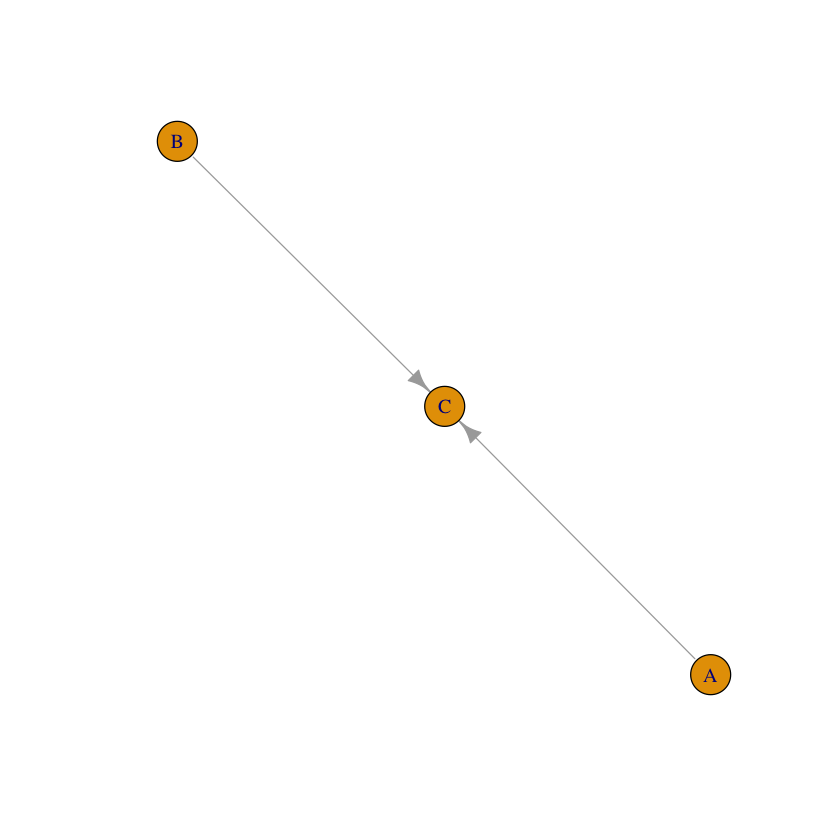

In [27]:
# create empty graph, add vetrices and edges
gg <- make_empty_graph(directed = T)
gg <- gg + vertices(c('A', 'B', 'C'))
gg <- gg + edges(c('A', 'C', 'B', 'C'))
plot(gg)

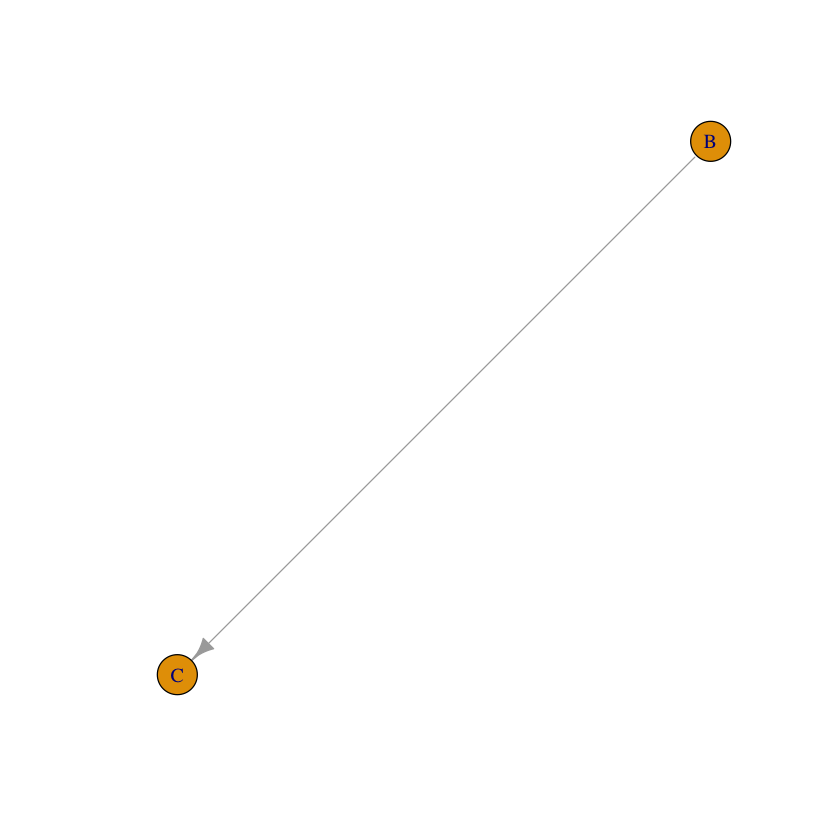

In [28]:
gg <- gg - V(gg)['A'] # remove vertex
plot(gg)

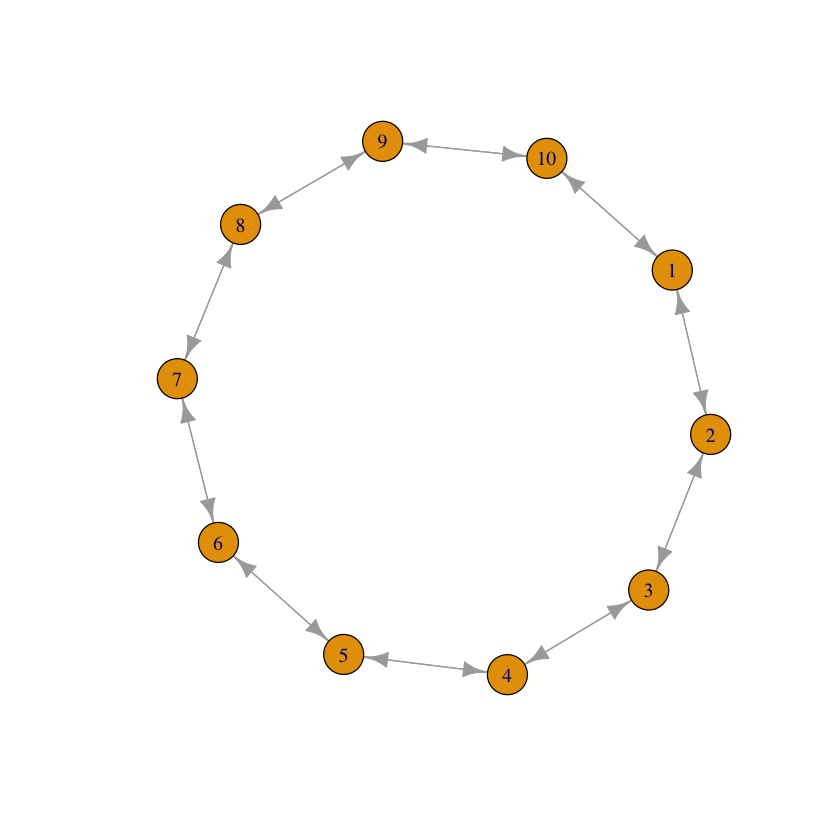

In [29]:
g_ring <- make_ring(n = 10, directed = T, mutual = T) # create directed ring graph with 2 way edges
plot(g_ring)

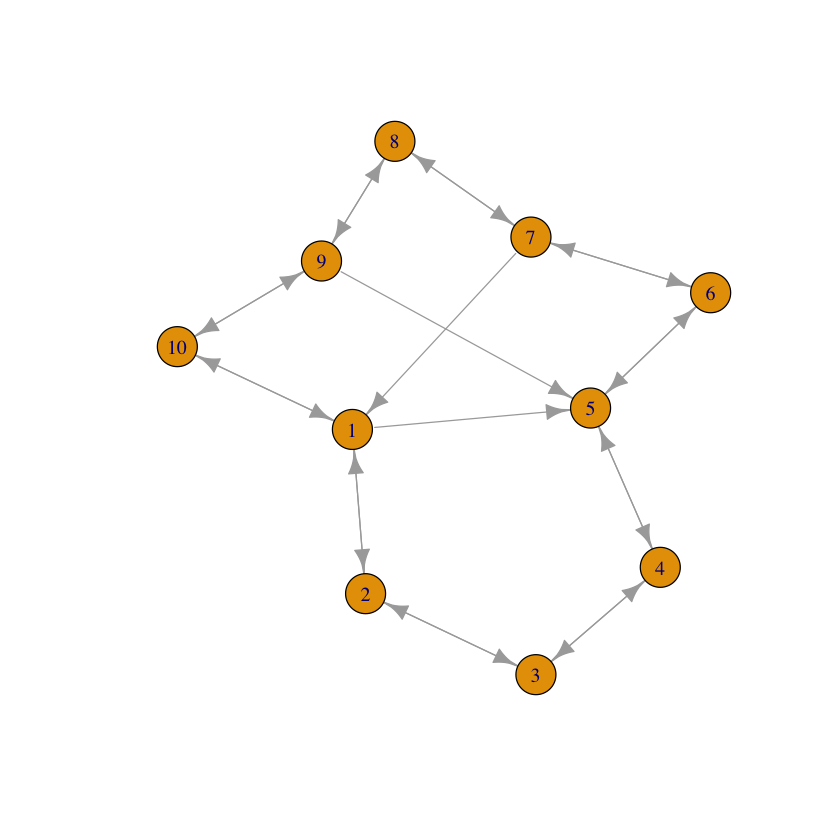

In [30]:
g_ring <- g_ring + edges(9,5,7,1,1,5) # add more edges
plot(g_ring)

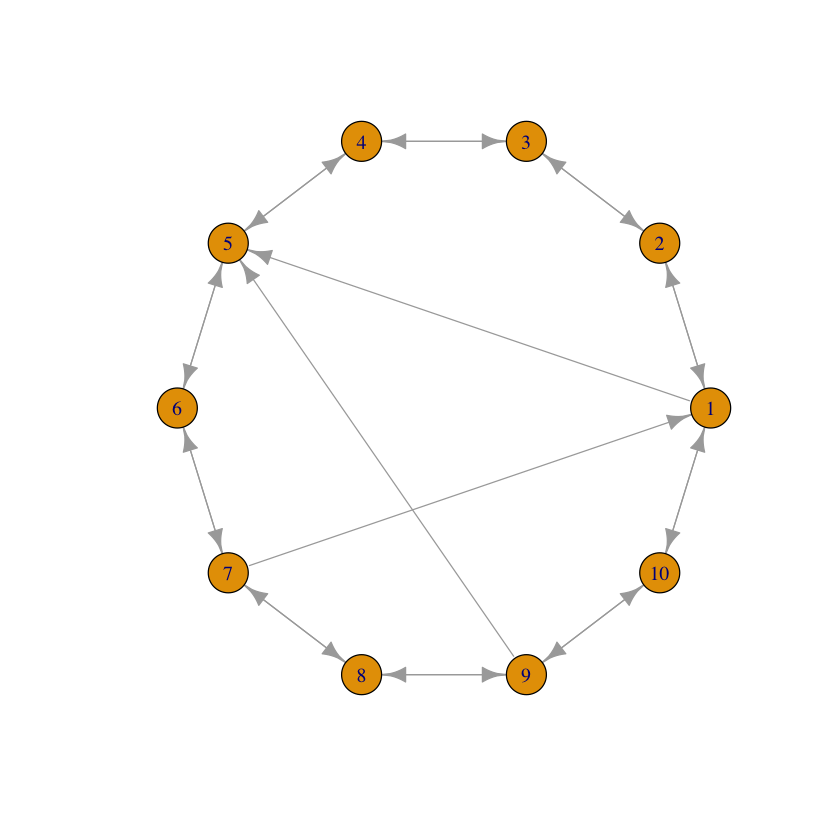

In [31]:
lo <- layout_in_circle(g_ring) # position vertices such that they form circle in plot
plot(g_ring, layout = lo)

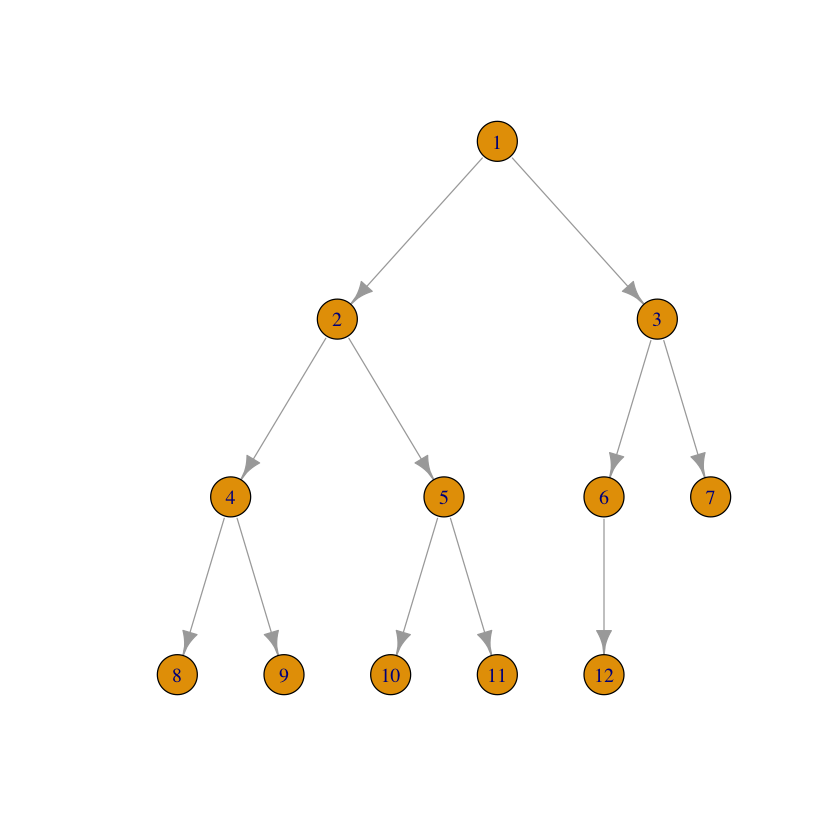

In [32]:
g_tree <- make_tree(n=12)
plot(g_tree, layout = layout_as_tree(g_tree, root = 1)) # position vertices such that they form tree in plot

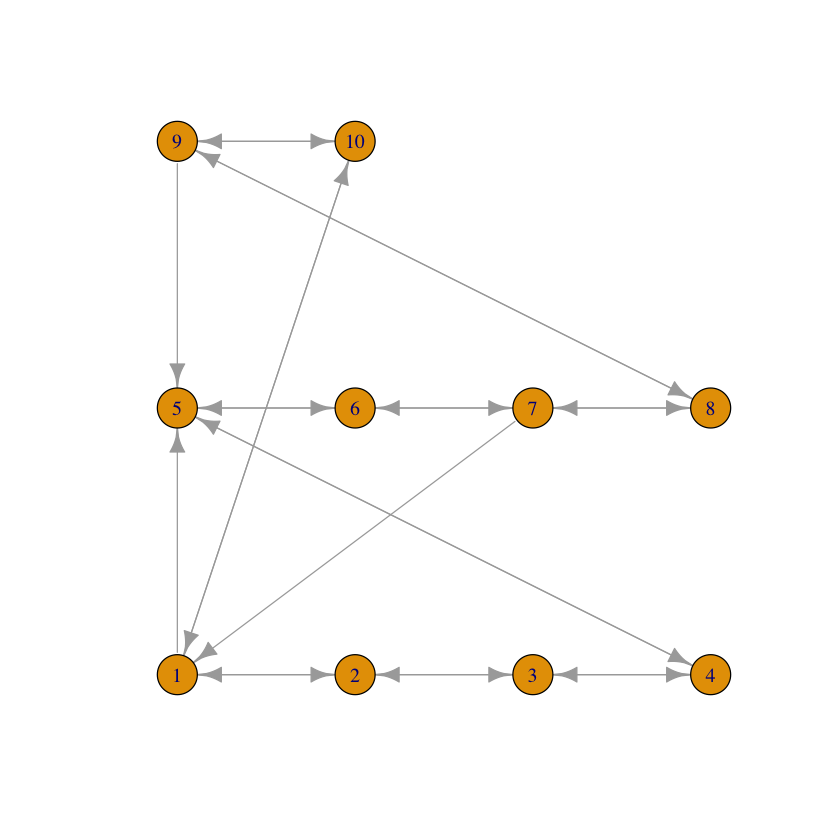

In [33]:
plot(g_ring, layout = layout_on_grid(g_ring)) # position vertices such that they form grid in plot

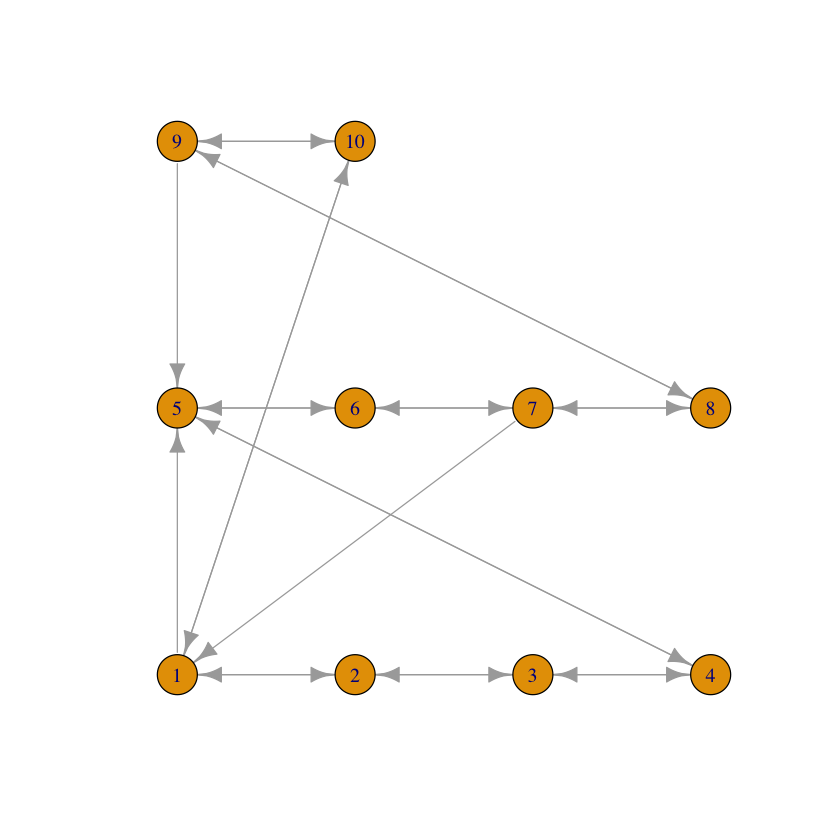

In [34]:
plot(g_ring, layout = layout_on_grid(g_ring))

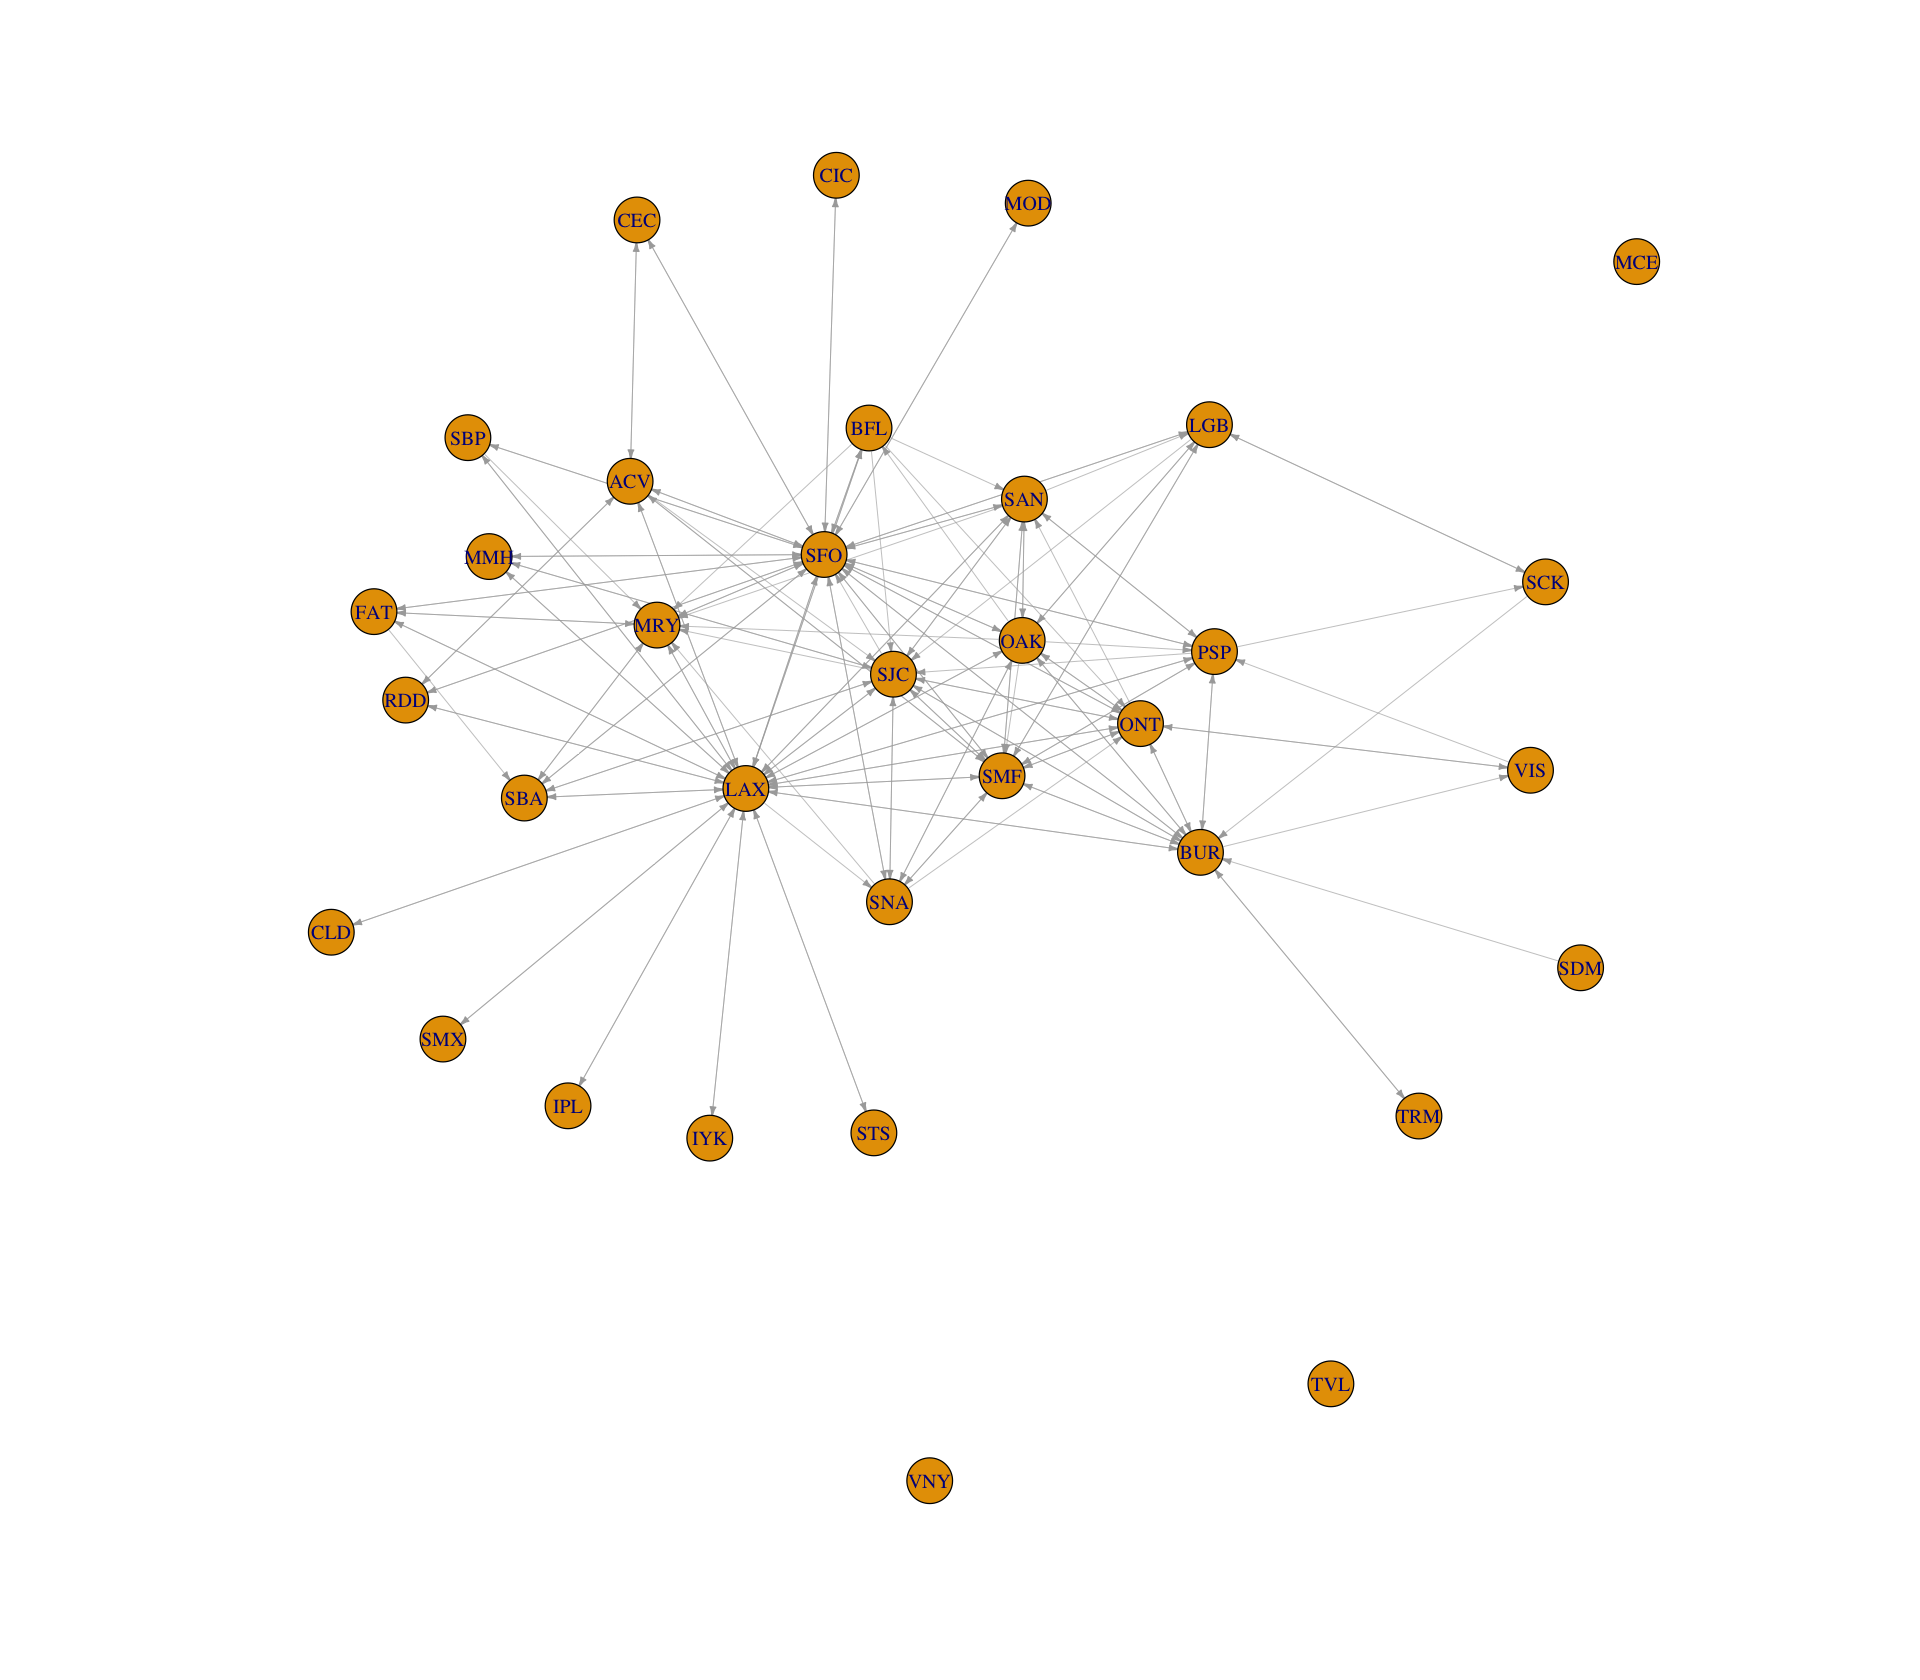

In [35]:
options(repr.plot.width = 16, repr.plot.height = 14)
plot(
    simplify(calAirports), # remove duplicate edges and loops (sometimes easier to see)
    layout = layout_with_kk(calAirports), 
    vertex.size = 7, 
    edge.width = 0.5, 
    edge.arrow.size = 0.15, 
    
)

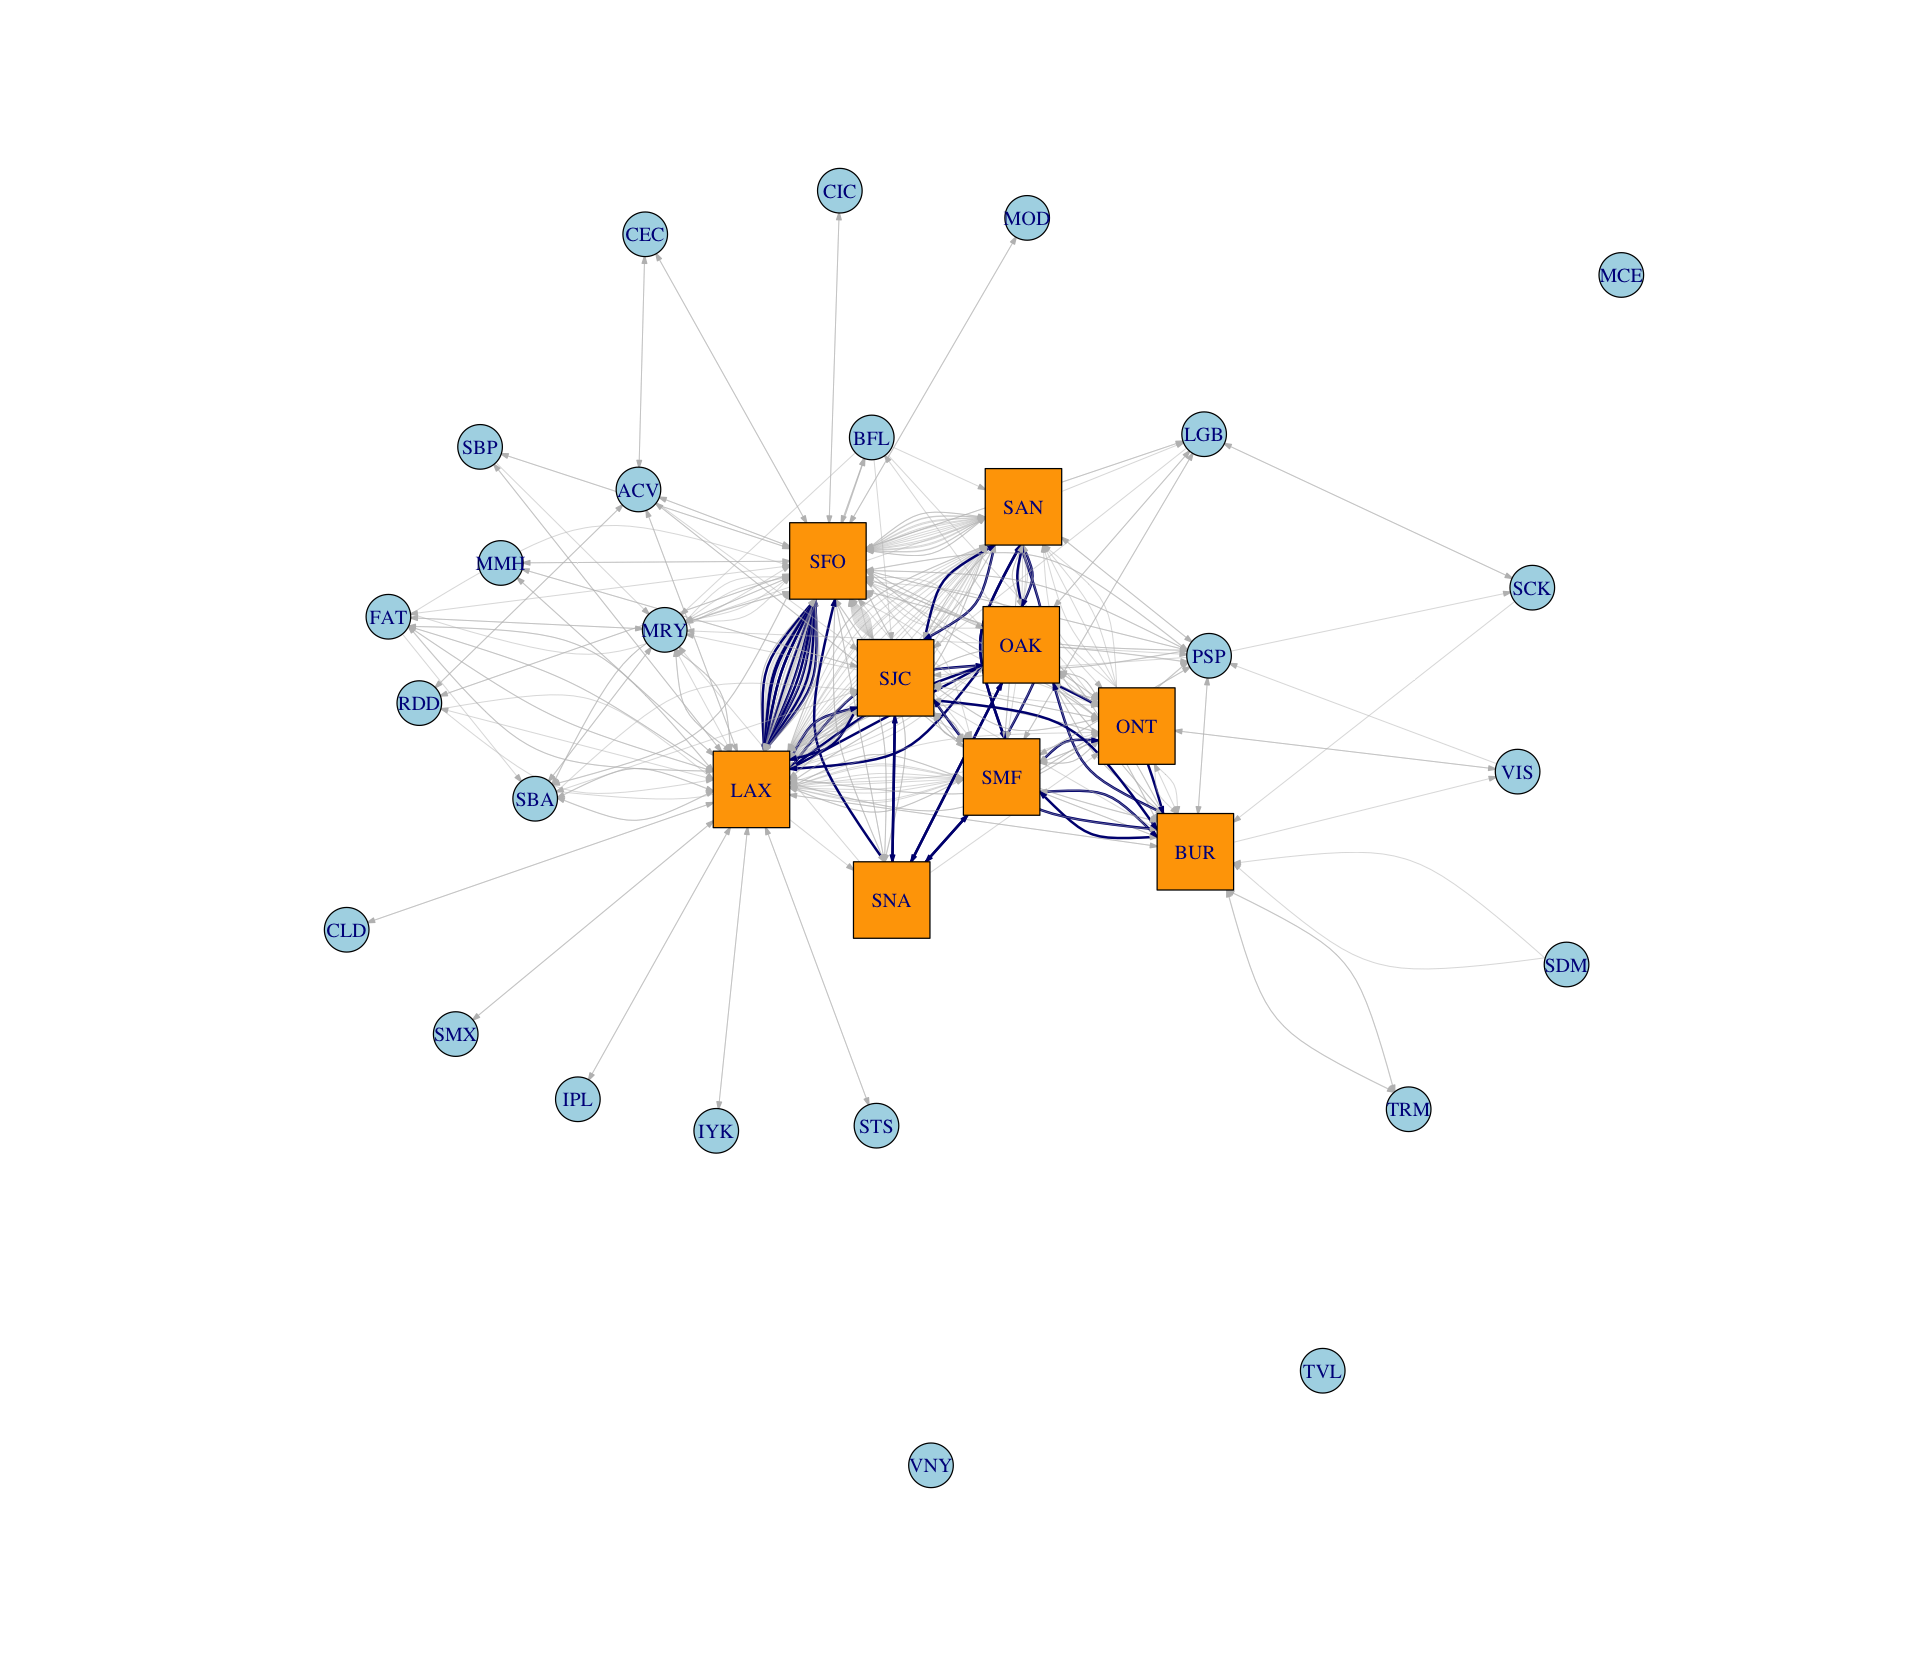

In [36]:
# flights between California airports with top 10 higest no. of passangers
high_p <- quantile(E(calAirports)$Passengers, 0.9)
flag <- E(calAirports)$Passengers > high_p

E(calAirports)$width <- 0.4
E(calAirports)[flag]$width <- 2
E(calAirports)$color <- 'gray'
E(calAirports)[flag]$color <- 'navy'

uniq_h <- unique(head_of(calAirports, E(calAirports)[flag]))
uniq_t <- unique(tail_of(calAirports, E(calAirports)[flag]))

V(calAirports)$size <- 7 
V(calAirports)[V(calAirports) %in% uniq_h | V(calAirports) %in% uniq_t]$size <- 12

V(calAirports)$shape <- 'circle'
V(calAirports)[V(calAirports) %in% uniq_h | V(calAirports) %in% uniq_t]$shape <- 'square'

V(calAirports)$color <- 'lightblue'
V(calAirports)[V(calAirports) %in% uniq_h | V(calAirports) %in% uniq_t]$color <- 'orange'


plot(
    calAirports, 
    layout = layout_with_kk(calAirports), 
    edge.arrow.size = 0.12,
)

In [37]:
# top 5 US airports with highest total flights (departure and arrival)
head(sort(degree(USairports, mode = 'total'), decreasing = T), n = 5)

ATL  ORD  DEN  DTW  MSP 
1700 1498 1389 1380 1330

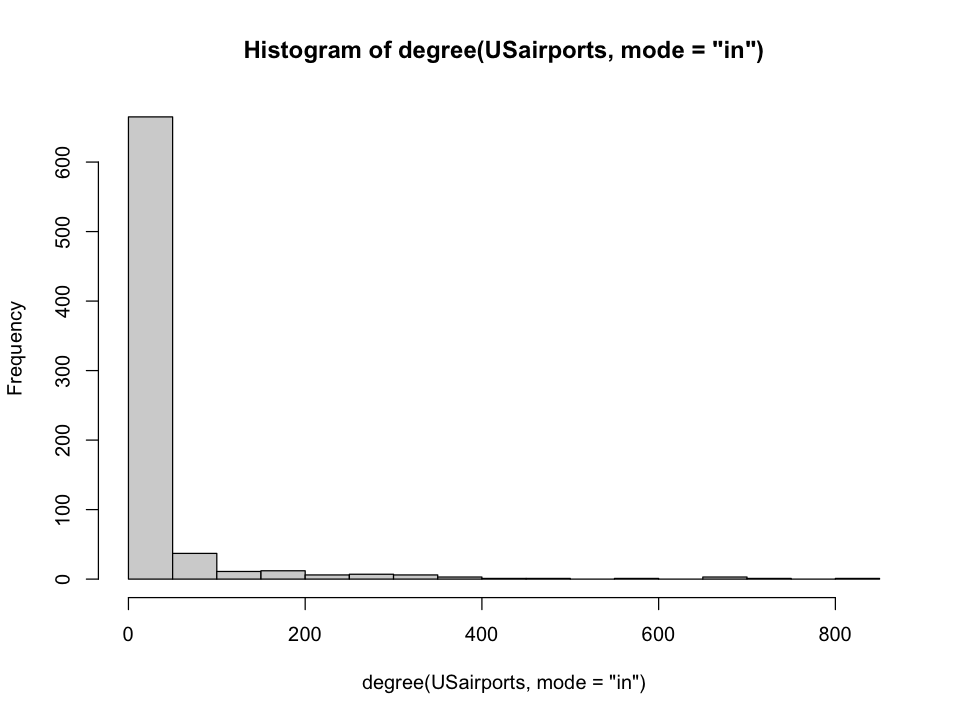

In [38]:
options(repr.plot.width = 8, repr.plot.height = 6)
hist(degree(USairports, mode = 'in'), breaks = 15)

[1] 0.5625

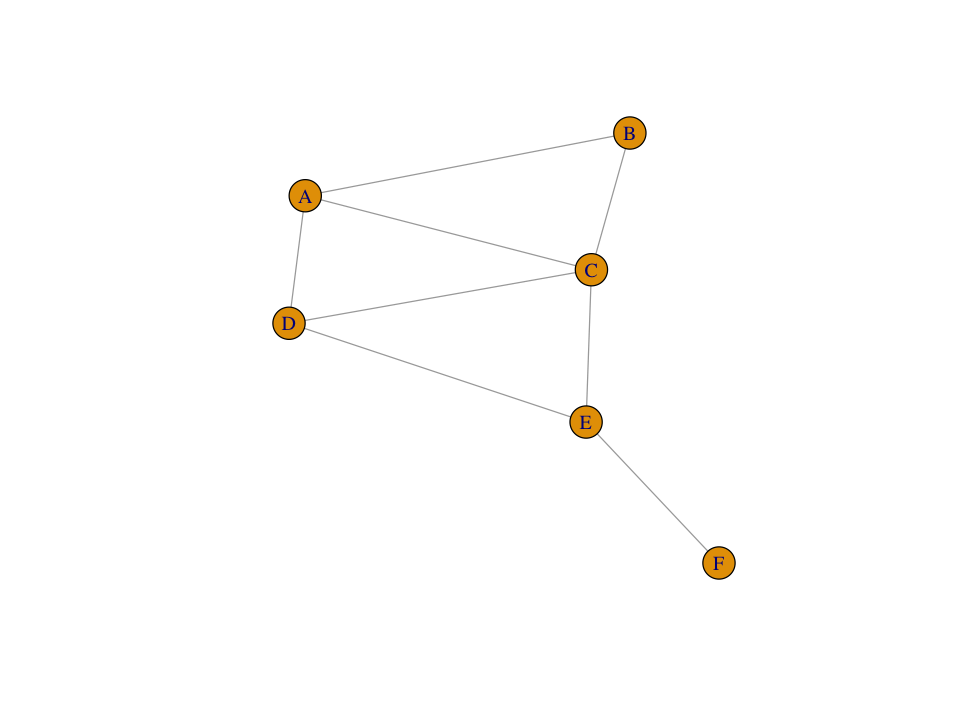

In [39]:
# direction of edge is ignored for transitivity
g <- graph_from_literal(A--B, A--C, A--D, B--C, C--D, D--E, E--C, E--F)
plot(g)
transitivity(g, type = 'global') # no. of closed traingles / no. of open traingles

In [40]:
t <- matrix(as_adjacency_matrix(g), nrow = 6)
sum(diag(t %*% t %*% t)) / (sum(t %*% t) -  sum(diag(t %*% t))) # no. of closed traingles / no. of open traingles

[1] 0.5625

In [41]:
# ratio of the triangles connected to the vertex and the triples centered on the vertex
transitivity(g, type = 'local')

[1] 0.6666667 1.0000000 0.5000000 0.6666667 0.3333333       NaN

In [42]:
shortest_paths(g, from = 'A', to = 'F')$vpath

[[1]]
+ 4/6 vertices, named, from bd4539b:
[1] A C E F


In [43]:
diameter(g) # longest shortest path length

[1] 3

In [44]:
distance_table(g)

$res
[1] 8 5 2

$unconnected
[1] 0

In [45]:
mean_distance(g) # (8 * 1 + 5 * 2 + 2 * 3) / (8 + 5 + 2)

[1] 1.6

In [46]:
# bridging will have high betweenness centrality value
betweenness(g)

A   B   C   D   E   F 
0.5 0.0 3.5 1.0 4.0 0.0

In [47]:
# high eigen centrality tells that the node has a lot of connections or is connected to someone with a lot of connections
eigen_centrality(g)$vector

A         B         C         D         E         F 
0.8246931 0.6121207 1.0000000 0.8462370 0.6978858 0.2341163

In [48]:
# tell chance of ending up in the nodes after travelling infinite time
# high page rank tells that the node linked to by nodes with high page rank
sort(page_rank(calAirports, directed = T)$vector, decreasing = T)

LAX         SFO         SAN         SJC         SMF         BUR 
0.169103268 0.168842064 0.085686201 0.067202022 0.057436490 0.053207459 
        OAK         ONT         PSP         MRY         SNA         SBA 
0.049277710 0.044068260 0.033135268 0.028727087 0.023969815 0.019386252 
        ACV         LGB         FAT         RDD         BFL         MMH 
0.017818581 0.017814683 0.017341416 0.011552428 0.010639131 0.010571959 
        SCK         TRM         CEC         SBP         VIS         MOD 
0.010145053 0.009794624 0.009685704 0.009028129 0.008984687 0.007161405 
        CIC         IYK         IPL         CLD         STS         SMX 
0.007161405 0.006636200 0.006636200 0.006636200 0.006636200 0.006636200 
        TVL         MCE         SDM         VNY 
0.004769475 0.004769475 0.004769475 0.004769475

In [ ]:
# st <- unique(ends(calAirports, es = E(calAirports)[flag])[,1])
# en <- unique(ends(calAirports, es = E(calAirports)[flag])[,2])

# above_mean <- 
# V(calAirports)[E(calAirports)[[E(calAirports)$Passengers > mean_p]]$tail]
# E(calAirports)[[]]
# V(calAirports)[[E(calAirports)$Passengers > mean_p]]
# E(calAirports)[[E(calAirports)$Passengers > mean_p]]$tail
# above_mean
# high_airport <- V(subgraph.edges(calAirports, E(calAirports)[E(calAirports)$width == 2]))
# V(calAirports)[V(calAirports) %in% above_mean$tail | V(calAirports) %in% above_mean$head]
# V(calAirports)$size <- 7
# V(calAirports)[high_airport]$size <- 12
# V(calAirports)$shape <- 'circle'
# V(calAirports)[high_airport]$shape <- 'square'
# V(calAirports)$color <- 'orange'
# V(calAirports)[high_airport]$color <- 'pink'